In [167]:
from ahh import pre, ext, vis, sci
import pandas as pd
import datetime

In [200]:
df = pre.read_csv('monthly/sleep_summary_20170301_20171028.csv', date='SLEEP DATE', time='START TIME')
df = df.drop('sleep date', axis=1).drop('start time', axis=1).drop('minutes to fall asleep', axis=1)
df.index = df.index - datetime.timedelta(hours=4) # because I sometimes sleep past 12 AM and it count as next day
df['weekday'] = df.index.weekday

dts = df.index
tib = df['time in bed'] / 60
tas = df['minutes asleep'] / 60
df.columns

Index(['time in bed', 'minutes asleep', 'awakenings count', 'minutes awake',
       'minutes after wakeup', 'efficiency', 'weekday'],
      dtype='object')

(3, 12)

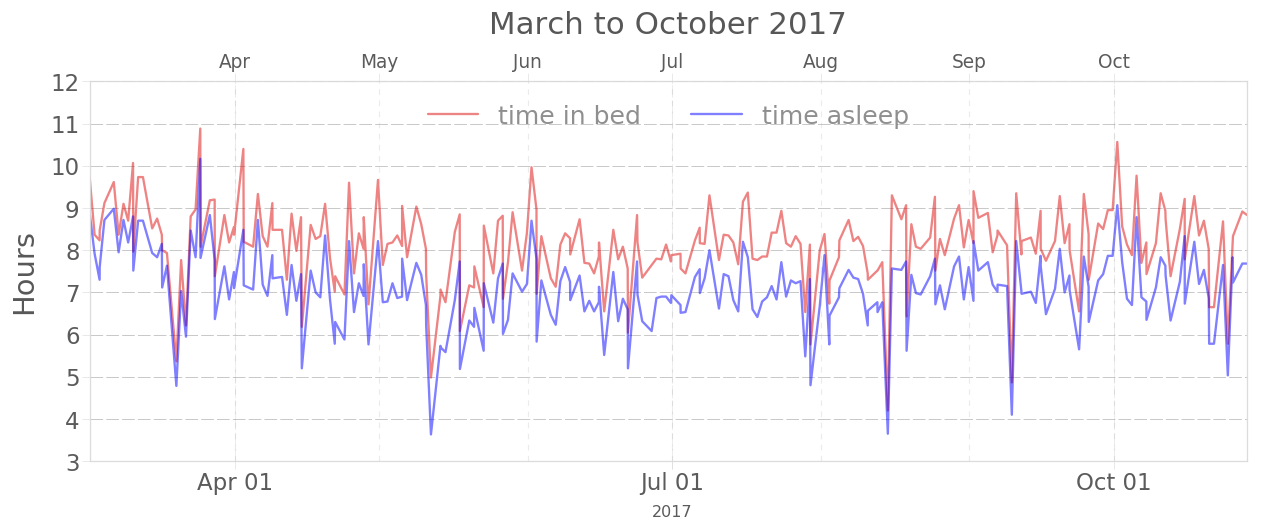

In [169]:
ax = vis.plot_line(dts, tib, label='time in bed')
_ = vis.plot_line(dts, tas, figsize='na', color='blue', label='time asleep')

ax.set_ylim(3, 12)
_ = vis.set_labels(ax, ylabel='Hours', title='March to October 2017', title_pad=1.12)
vis.set_legend(ax, ncol=3, loc='top center')

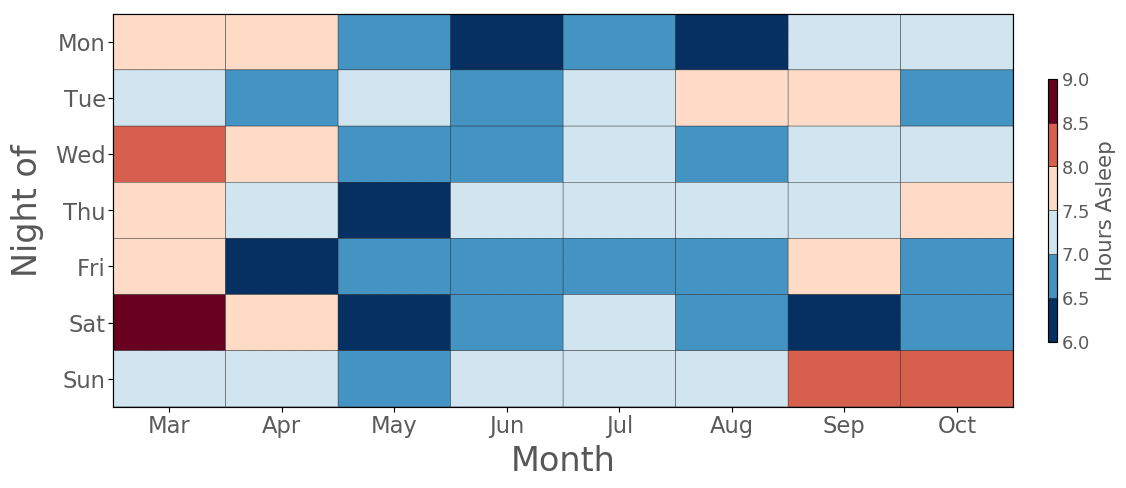

In [225]:
df_gb = df.groupby([df.index.month, 'weekday']).mean()
df_gb = df_gb.reset_index()
df_piv = df_gb.pivot(index='weekday', columns='level_0', values='minutes asleep') / 60
df_piv.index = ext.MISC['weekdays_short']
df_piv.columns = ext.MISC['months_short'][2:10]
vis.plot_heatmap(df_piv, data_lim=(6, 9), ylabel='Night of', xlabel='Month', cbar_label='Hours Asleep')

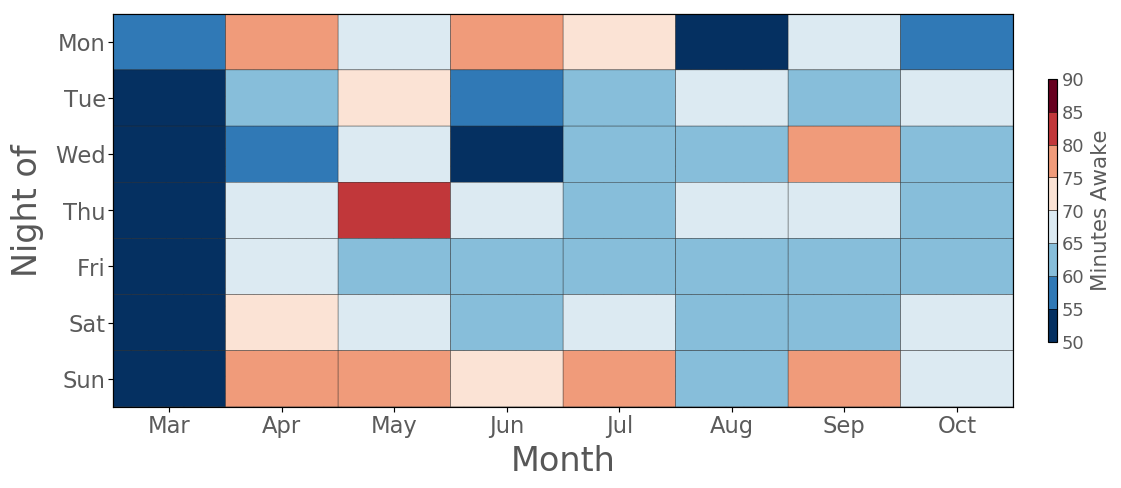

In [246]:
df_gb = df.groupby([df.index.month, 'weekday']).mean()
df_gb = df_gb.reset_index()
df_piv = df_gb.pivot(index='weekday', columns='level_0', values='minutes awake')
df_piv.index = ext.MISC['weekdays_short']
df_piv.columns = ext.MISC['months_short'][2:10]
vis.plot_heatmap(df_piv, data_lim=(50, 90), interval=5, ylabel='Night of', xlabel='Month', cbar_label='Minutes Awake')

In [236]:
df

,time in bed,minutes asleep,awakenings count,minutes awake,minutes after wakeup,efficiency,weekday
2017-03-01 18:36:00,583,532,26,51,0,91,2
2017-03-02 19:02:00,502,475,12,27,0,95,3
2017-03-03 19:58:00,494,438,28,55,1,89,4
2017-03-03 20:23:00,508,456,27,52,0,90,4
2017-03-04 20:03:00,547,523,12,24,0,96,5
2017-03-06 18:53:00,577,539,16,38,0,93,0
2017-03-07 19:04:00,502,477,15,25,0,95,1
2017-03-08 19:28:00,546,523,12,23,0,96,2
2017-03-09 18:44:00,522,491,15,31,0,94,3
2017-03-10 19:06:00,604,528,39,72,4,88,4
